In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

content = load_dataset('lukebarousse/data_jobs')
df = content['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


d:\mini\envs\project_pr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

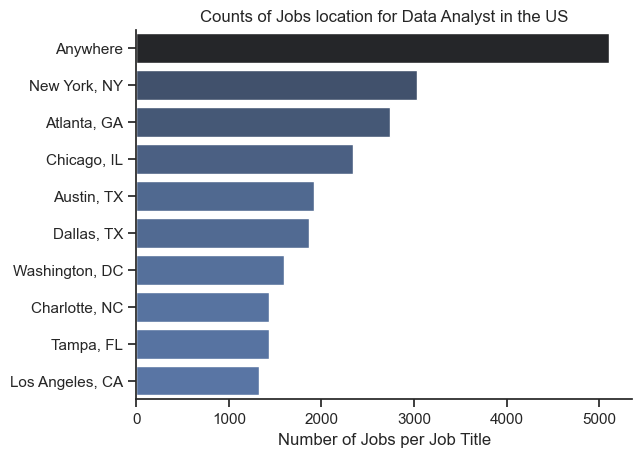

In [4]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Jobs location for Data Analyst in the US')
plt.xlabel('Number of Jobs per Job Title')
plt.ylabel('')
plt.show()

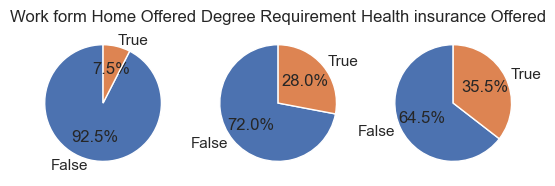

In [5]:
dict_column = {
    'job_work_from_home' : 'Work form Home Offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health insurance Offered'
}

fig,ax = plt.subplots(1,3)

for i ,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(),labels = ['False','True'],autopct = '%1.1f%%',startangle= 90)
    ax[i].set_title(title)
plt.show()

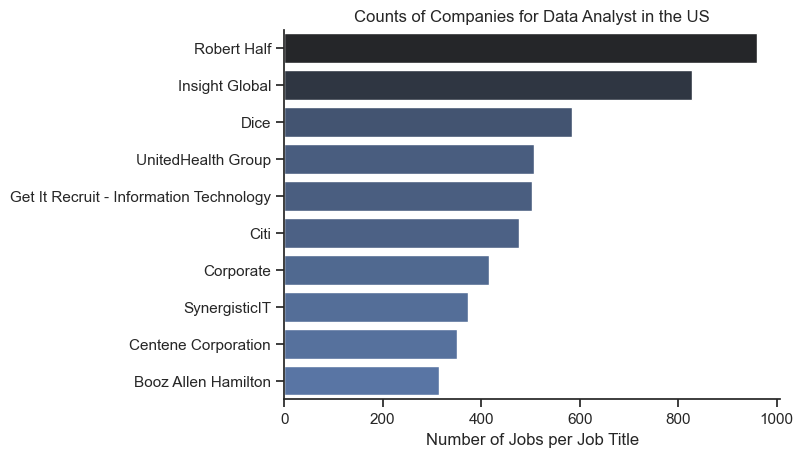

In [6]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs per Job Title')
plt.ylabel('')
plt.show()